In [9]:
import pandas as pd
import sys
import re
import string
from collections import Counter
from textblob import TextBlob
reload(sys)
sys.setdefaultencoding('utf-8')


In [10]:
df=pd.read_csv('review.csv')
df.head()

,Rating,Review
0,5,Emergency room volunteers and medical staff ar...
1,5,This place is amazing! They treated my friend ...
2,5,I have the privilege of being part of the Taip...
3,1,went for a famous cardiovascular doctor for my...
4,5,I was lucky enough to find a good doctor here ...


In [11]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text=re.sub('\xa1', '',text)
    text.replace('\xa6', '')
    text=re.sub('\r', '',text)
    text=re.sub('\xf4', '',text)
    text=re.sub('\xaa', '',text)
    text=re.sub('\xad', '',text)
    return text

round1 = lambda x: clean_text_round1(x)

In [12]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(df.Review.apply(round1))
data_clean.head()

,Review
0,emergency room volunteers and medical staff ar...
1,this place is amazing they treated my friend w...
2,i have the privilege of being part of the taip...
3,went for a famous cardiovascular doctor for my...
4,i was lucky enough to find a good doctor here ...


In [13]:
data_clean.Review.tolist()

['emergency room volunteers and medical staff are all very professional and caring icu staff are caring and candid too hospital staff do their best to meet patient and familys wish giving us tip on how to care for the patient and items that they need to stay overnight',
 'this place is amazing they treated my friend who speaks no chinese so kindly and patiently and made sure that she had everything she needed during her stay also the food court is like no other hospital food court i have ever seen i would totally recommend this hospital if you need to go to one',
 'i have the privilege of being part of the taipei veterans general hospital and its world class service it is a pioneer in medical treatment and has an unmatched medical service personally i have the honor to be part of the prestigious orthopaedic oncology team as visiting fellow and every day that goes by i continue to be amazed at the hard work and meticulous study of our patients taiwan is lucky to have such an wonderful h

In [14]:
data_clean["Rating"]=df["Rating"]
sub_df=data_clean[data_clean.Rating==5]
sub_df.head()

,Review,Rating
0,emergency room volunteers and medical staff ar...,5
1,this place is amazing they treated my friend w...,5
2,i have the privilege of being part of the taip...,5
4,i was lucky enough to find a good doctor here ...,5
5,good hospital and services renovations going o...,5


In [15]:
sentences=sub_df.Review.tolist()


In [16]:
tag_pairs = []
for i in range(len(sentences)):
    blob = TextBlob(sentences[i])
    tag_pairs.extend(blob.tags)

nouns=list()
for pairs in tag_pairs:
    print pairs
    word=pairs[0]
    tag=pairs[1] 
    if tag=="NN" or tag=="NNS":
        nouns.append(word.lemmatize())
str1 = ' '.join(nouns)    

In [17]:
Counter(nouns).most_common()

[('hospital', 93),
 ('doctor', 51),
 ('care', 41),
 ('service', 38),
 ('i', 36),
 ('patient', 35),
 ('nurse', 32),
 ('team', 31),
 ('staff', 29),
 ('treatment', 26),
 ('center', 24),
 ('year', 21),
 ('food', 20),
 ('people', 19),
 ('taipei', 17),
 ('research', 15),
 (u'veteran', 15),
 ('health', 14),
 ('equipment', 14),
 ('thanks', 14),
 ('environment', 12),
 (u'physician', 12),
 ('family', 11),
 ('thank', 11),
 ('quality', 11),
 ('kind', 11),
 ('technology', 11),
 ('area', 11),
 ('building', 11),
 ('time', 10),
 (u'volunteer', 10),
 ('floor', 10),
 ('court', 9),
 ('medicine', 9),
 ('disease', 9),
 ('dr', 9),
 ('surgery', 9),
 ('emergency', 9),
 ('department', 9),
 ('chen', 8),
 ('patience', 8),
 ('room', 8),
 ('nursing', 8),
 ('attitude', 8),
 ('place', 8),
 ('level', 7),
 ('work', 7),
 ('kaohsiung', 7),
 ('branch', 7),
 ('teeth', 7),
 ('street', 6),
 ('china', 6),
 ('ward', 6),
 (u'standard', 6),
 ('firstclass', 6),
 ('president', 6),
 ('taiwan', 6),
 ('world', 6),
 ('home', 6),
 (u'

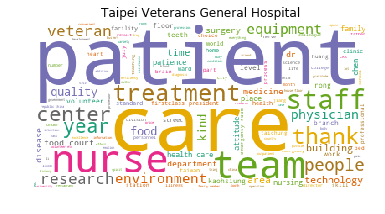

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline  
from wordcloud import WordCloud
stop_words=['hospital',"taipei","doctor","service"]
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
wc.generate(str1)
plt.imshow(wc)
plt.axis("off")
plt.title("Taipei Veterans General Hospital")
plt.show()